In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
from pyik.numpyext import binomial_proportion
import matplotlib.pyplot as plt
import os

In [23]:
# extract data from excel
path_to_excel_file = "C:/Users/Hendrik/OneDrive/active_sync_storage/Uni/MPIK/Bachelor/Teilchenwelt_detector/Efficency_measurements.xlsx"
measured_data = pd.read_excel(path_to_excel_file)
measured_data

,Readout setup,Detector in the middle,Threshold settings [mV],Measurment length [s],Counter top<->bottom,Error,Coutner (top<->bottom)<->mid,Error.1,Unnamed: 8,Percentage,Error (relative),Error (FF),Error (Michael),Counts [Hz],Counts [1/min]
0,NIM 100ns gates,Scintillator-box #2 MPIK1,"30,3; 30,3; 30,5",1210.219000,4889,69.921384,4857,69.692180,NaN,99.345469,2.012645,2.012645,0.001161,NaN,NaN
1,"DAQ-Card2, with defaults",Scintillator-box #2 MPIK1,"[300,303-14,303-11,305-17]",1198.548292,4355,65.992424,4290,65.498092,NaN,98.507463,2.118990,2.118990,0.001865,NaN,NaN
2,NIM 100ns gates,Scintillator-box #1 MPIK1,"30,3; 30,3; 30,5",1200.000000,4765,69.028979,4716,68.673139,NaN,98.971668,2.032917,2.032917,0.001477,NaN,NaN
3,NIM 100ns gates,Scintillator-box #3 MPIK1,NaN,1200.000000,4675,68.373972,4655,68.227560,NaN,99.572193,2.061713,2.061713,0.000959,NaN,NaN
4,"DAQ-Card2, with defaults",Scintillaotr-box #3 MPIK1,NaN,1198.197488,4318,65.711491,4230,65.038450,NaN,97.962019,2.119232,2.119232,0.002195,NaN,NaN
5,"DAQ-Card2, with defaults",Scintillaotr-box #1 MPIK1,NaN,1798.394207,6860,82.825117,6157,78.466553,NaN,89.752187,1.575629,1.575629,0.004080,NaN,NaN
6,"DAQ-Card2, with defaults",Scintillaotr-box #1 MPIK1,NaN,1198.734896,4829,69.491007,4366,66.075714,NaN,90.412094,1.888130,1.888130,0.004686,NaN,NaN


In [24]:
n_selected = np.asarray(measured_data['Coutner (top<->bottom)<->mid'])
n_tot = np.asarray(measured_data['Counter top<->bottom'])

In [25]:
prop

array([ 0.99345469,  0.98507463,  0.98971668,  0.99572193,  0.97962019,
        0.89752187,  0.90412094])

In [27]:
prop, upper, lower = binomial_proportion( n_selected, n_tot, coverage=0.683)
tested_labels = []
tested_index = []
total_eff = 1
total_err_up = 0
total_err_down = 0
for i in range(len(measured_data['Readout setup'])):
    if "NIM" in measured_data['Readout setup'][i]:
        tested_labels.append(measured_data['Detector in the middle'][i])
        tested_index.append(i)
        print("ratio={}\terr_up={}\terr_down={};\tlabel: {}".format(prop[i], upper[i], lower[i], measured_data['Detector in the middle'][i]))
        total_eff *= prop[i]
        total_err_up += np.square(upper[i]/prop[i])
        total_err_down += np.square(lower[i]/prop[i])

# calculate the values for the whole detector
total_err_up = total_eff * np.sqrt(total_err_up)
total_err_down = total_eff * np.sqrt(total_err_down)
total_eff, total_err_up, total_err_down

ratio=0.993454694211	err_up=0.00125934261642	err_down=0.00105726155524;	label: Scintillator-box #2 MPIK1
ratio=0.989716684155	err_up=0.001568755694	err_down=0.00136298759401;	label: Scintillator-box #1 MPIK1
ratio=0.995721925134	err_up=0.00106709967664	err_down=0.000854799278773;	label: Scintillator-box #3 MPIK1


(0.97903231710415495, 0.0022470483673471399, 0.0018999518170637905)

In [9]:
tested_index = np.asarray(tested_index)
tested_labels = np.asarray(tested_labels)
sorted_indexes = tested_index[np.argsort(tested_labels)]
sorted_labels = tested_labels[np.argsort(tested_labels)]

shortend_labels = sorted_labels
for i in range(len(shortend_labels)):
    shortend_labels[i] = 'B'+shortend_labels[i][14:19]

upper_error = upper[sorted_indexes]
lower_error = lower[sorted_indexes]
errors = [upper_error, lower_error]

tested_index, tested_labels, np.argsort(tested_labels), sorted_indexes, sorted_labels, shortend_labels

(array([0, 2, 3]),
 array([u'Scintillator-box #2 MPIK1', u'Scintillator-box #1 MPIK1',
        u'Scintillator-box #3 MPIK1'],
       dtype='<U25'),
 array([1, 0, 2], dtype=int64),
 array([2, 0, 3]),
 array([u'Box #1', u'Box #2', u'Box #3'],
       dtype='<U25'),
 array([u'Box #1', u'Box #2', u'Box #3'],
       dtype='<U25'))

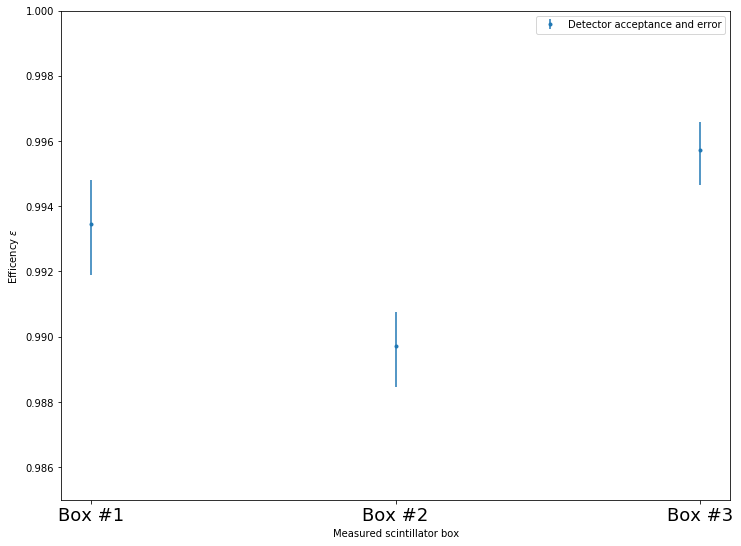

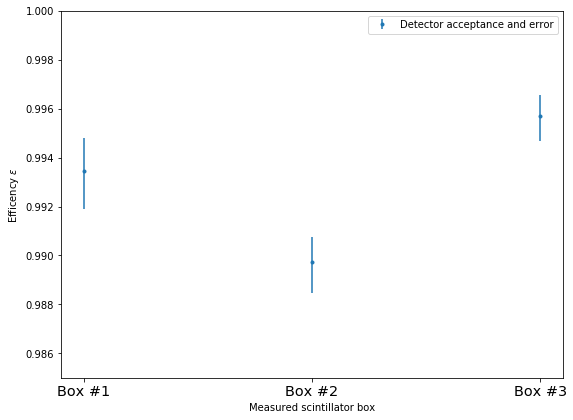

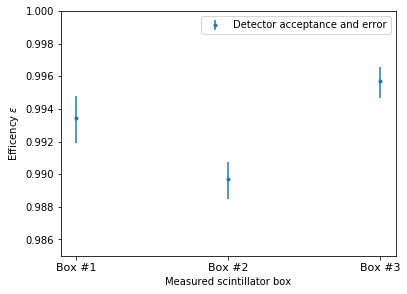

In [13]:
x_ticks_labels = shortend_labels
x = range(len(x_ticks_labels))

# create folder for the plot dump
directory = "plot_save/thesis_plots/"
if not os.path.exists(directory):
    os.makedirs(directory)

for size_factor in (1., .75, .5):

    fig, ax = plt.subplots()
    fig.set_size_inches(size_factor*9*4./3., size_factor*9)
    
    plt.errorbar([0,1,2], prop[tested_index],
                     yerr=errors, fmt='o',
                     markersize=3, label="Detector acceptance and error")

    # Set number of ticks for x-axis
    ax.set_xticks(x)
    # Set ticks labels for x-axis
    ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14*size_factor+4)
    axes = plt.gca()
    axes.set_ylim([.985,1.])
    plt.legend()
    plt.xlabel("Measured scintillator box")
    plt.ylabel(r'Efficency $\varepsilon$')
    plt.savefig(directory+"size_{}_efficency.pdf".format(size_factor))
    plt.show()